In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from gensim.models import Phrases
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
py_version

### Reading the previosly cleaned data

In [3]:
import preprocess_text as pt

#import our function to import data and clean it 
train_df,val_df = pt.suicidal_intent_data_load(test_dataset = False,remove_stopwords = False,standardization=True)
train_df.head()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
Hi


,target,text
687284,1,miss ever so much hope the train station incid...
556748,1,im veri veri jalous i want that too i have st...
662204,1,soo0o0o0 bloodi tire hurri home squshi xox i n...
819329,0,rosetta stone work great i just need to use i...
891369,0,transform the other r lame


### Remove stop words

In [3]:
#Load stopwords from nltk library
stop_words = stopwords.words('english')

#create function to remove stopwords in the text
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

#apply remove stopwords function to train_df, test_df and val_df
train_df['text'] = train_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_stopwords)
val_df['text'] = val_df['text'].apply(remove_stopwords)

train_df.head()

,target,text
1101153,0,page little miss xxx
715197,1,"hopefully i'll see tomorrow then. i'll there, ..."
978528,0,goodnight! sweetdreams!
827186,0,not. drinks ardens apartment
1440174,0,came back friends graduation party. nice seein...


### Stemming

Stemming reduces the inflectional and derivational forms of words to a common base form, which can simplify text analysis and improve the accuracy of text-based applications.

For example, the words "running", "runs", and "ran" can be reduced to their stem "run", which can help to identify them as variants of the same word and thus improve the accuracy of analysis.

In [3]:
#Load stemmer library from nltk
stemmer = nltk.SnowballStemmer("english")

#create function for stemming
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

#Apply stemming function to train_df, test_df, and val_df 
train_df['text'] = train_df['text'].apply(stemm_text)
test_df['text'] = test_df['text'].apply(stemm_text)
val_df['text'] = val_df['text'].apply(stemm_text)
train_df.head()

### WordCloud Viz

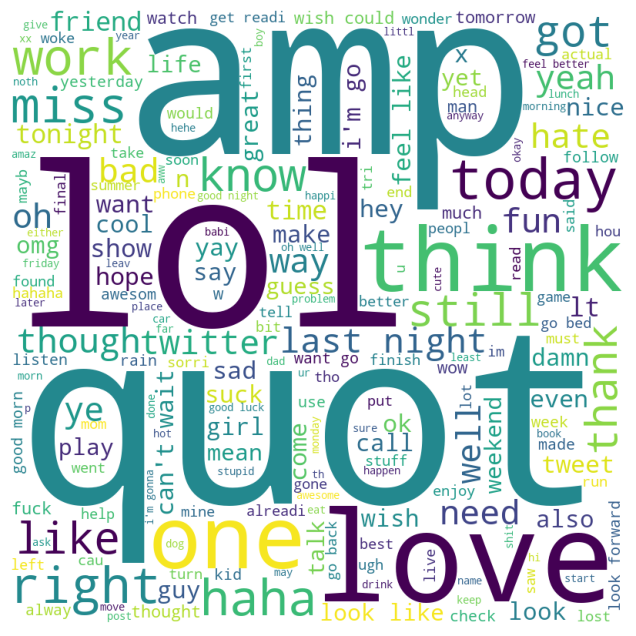

In [5]:
from wordcloud import WordCloud
stop_words = ["amp", "quot"]
# create a WordCloud object
wordcloud = WordCloud(stopwords = stop_words,
                      width = 800, height = 800,
                      background_color = "white",
                     min_font_size = 10)

#create a WordCloud visualization for the train_df and val_df
text = " ".join(i for i in train_df.text)
text = text + " ".join(i for i in val_df.text)
wordcloud = wordcloud.generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:

stop_words = ["amp", "quot"]

# create a WordCloud object
wordcloud = WordCloud(stopwords = stop_words,
                      width = 800, height = 800,
                      background_color = "white",
                     min_font_size = 10)

#create a WordCloud visualization for negative sentiment
text1 = " ".join(i for i in train_df[train_df["target"]==1].text)
text1 = text1 + " ".join(i for i in val_df[val_df["target"]==1].text)
wordcloud = wordcloud.generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Vectorization

##### CountVectorizer

A count vectorizer is a tool used to convert a collection of text documents into a matrix of word counts. It is a common method used in natural language processing (NLP) to represent textual data in a way that machine learning algorithms can process it.

The count vectorizer takes as input a corpus of text documents (e.g., a collection of tweets or news articles) and creates a document-term matrix where each row represents a document and each column represents a word in the corpus. The values in the matrix represent the frequency of each word in each document.

In [5]:
new_df = pd.concat([train_df,val_df])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# create a CountVectorizer object
count_vec = CountVectorizer()

# fit 
count_vec.fit(new_df.text)
#transform
x_train_cvec = count_vec.transform(train_df.text)
#x_test_cvec  = count_vec.fit_transform(test_df.text)
val_df_cvec  = count_vec.transform(val_df.text)

#new_df_cvec = count_vec.fit_transform(new_df.text)

##### TF-IDF Vectorizer

TF-IDF (term frequency-inverse document frequency) vectorizer is a tool used to convert a collection of text documents into a numerical representation, similar to a count vectorizer. However, instead of simply counting the frequency of each word in a document, it takes into account the importance of each word in the document and in the whole corpus.

TF-IDF is calculated by multiplying the term frequency (TF) of a word by the inverse document frequency (IDF). The term frequency is the number of times a word appears in a document, while the inverse document frequency is a measure of how much information a word provides, based on how frequently it appears in the corpus.

In simple terms, the TF-IDF vectorizer gives more weight to words that appear frequently in a particular document but less frequently in the other documents in the collection. This helps to identify words that are particularly important or unique to a given document, compared to other documents in the collection.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TF-IDF Vectorizer object
tfidf_vec = TfidfVectorizer(ngram_range=(1,2),max_features=3891472)
#fit
#tfidf_vec.fit(train_df.text)
tfidf_vec.fit(new_df.text)

TfidfVectorizer(max_features=3891472, ngram_range=(1, 2))

In [9]:
#transform
x_train_tfidf = tfidf_vec.transform(train_df.text)
#x_test_tfidf  = tfidf_vec.transform(test_df.text)
val_df_tfidf  = tfidf_vec.transform(val_df.text)

##### Word2Vec

Word2Vec is a natural language processing (NLP) technique for representing words in a high-dimensional vector space, developed by researchers at Google. It is a type of neural network algorithm that learns to associate words with their context, and can be used to create dense, numerical representations of words called word embeddings.

Word2Vec works by training a neural network on a large corpus of text data, such as a collection of news articles or Wikipedia pages. The neural network is trained to predict the probability of a word occurring in a context of other words, using a sliding window over the text data.

As the neural network learns to predict the context of each word, it also updates the word embeddings, which are numerical representations of the words in a high-dimensional space. These embeddings capture the relationships between words, based on their co-occurrence patterns in the text corpus.

In [26]:
from gensim.models import Word2Vec

# Tokenize the sentences in the train DataFrame
sentences = train_df.text.apply(lambda x:  x.split()).tolist()
# Train your Word2Vec model
train_df_word2vec = Word2Vec(sentences, min_count=1)


# Tokenize the sentences in the test DataFrame
#sentences = test_df.text.apply(lambda x: word_tokenize(x)).tolist()
# Train your Word2Vec model
#test_df_word2vec = Word2Vec(sentences, min_count=1)


# Tokenize the sentences in the test DataFrame
sentences = val_df.text.apply(lambda x:  x.split()).tolist()
# Train your Word2Vec model
val_df_word2vec = Word2Vec(sentences, min_count=1)

In [29]:
import gensim

# Tokenize the sentences in the train DataFrame
sentences = train_df['text'].apply(lambda x: x.split()).tolist()
# Train the Word2Vec model
model = gensim.models.Word2Vec(sentences, min_count=1)

In [37]:
print(model.wv.get_vector("rock", norm=True))

[ 6.37870282e-02  1.32115766e-01 -2.20632218e-02 -1.64909765e-01
  6.37964159e-02 -3.64332423e-02  2.48526130e-02 -3.88365500e-02
 -7.64326006e-02  5.60050607e-02 -7.06956312e-02 -1.69965640e-01
 -7.65070245e-02  3.16349417e-02  2.45486423e-02  1.20186701e-01
  6.80928752e-02  3.04023251e-02 -6.33780193e-03 -2.20233858e-01
  1.68855488e-02  2.87334248e-02  1.06557027e-01  1.49494767e-01
  1.62306968e-02 -1.49526387e-01 -7.26382062e-02 -9.78446826e-02
  1.70788512e-01 -6.22139014e-02 -1.17772028e-01 -1.47101730e-01
  5.45406379e-02 -2.80687716e-02 -7.48574315e-03  4.30785455e-02
 -2.31315009e-02 -3.38157117e-02  6.88678771e-02  1.06922038e-01
 -3.99654694e-02 -1.28460163e-02  1.10553697e-01 -2.58094463e-02
  6.20311834e-02 -1.24637716e-01  2.10658073e-01  6.03687111e-03
  3.77032980e-02 -3.40915583e-02 -2.70872307e-03 -4.65136841e-02
 -2.51960099e-01  5.41055687e-02 -6.13745142e-05 -1.80930957e-01
 -1.02289356e-01  1.28676772e-01  4.74059805e-02  8.50354135e-03
 -7.12775290e-02  9.17263

In [53]:
#Define generate embeddings function
def generate_embeddings(text, model):
    words = text.split()
    embeddings = []
    for word in words:
        if word in  model.wv.key_to_index:
            embeddings.append(model.wv.get_vector(word, norm=True))
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

In [54]:
train_df['embeddings'] = train_df['text'].apply(lambda x: generate_embeddings(x, model))

In [52]:
val_df['embeddings'] = val_df['text'].apply(lambda x: generate_embeddings(x, model))

### Modeling

#### Logistic Regression

Logistic Regression with TF IDF

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score, 
                             classification_report,
                             accuracy_score)

#Instantiate a LogisticRegression classifier
LogReg = LogisticRegression()

#Fit classifier to train data
LogReg.fit(x_train_tfidf, train_df.target)
#Predict
y_pred = LogReg.predict(val_df_tfidf)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(val_df.target, y_pred)
precision = precision_score(val_df.target, y_pred)
recall = recall_score(val_df.target, y_pred)
f1 = f1_score(val_df.target, y_pred)

print(f"Model: Logistic Regression on TF-IDF")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model: Logistic Regression on TF-IDF
Accuracy: 0.82
Precision: 0.83
Recall: 0.80
F1 score: 0.81


Logistic Regression with Count Vectorizer

In [19]:
#Instantiate a LogisticRegression classifier
LogReg2 = LogisticRegression()
#Fit to training data
LogReg2.fit(x_train_cvec, train_df.target)
#Predict
y_pred = LogReg2.predict(val_df_cvec)

#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(val_df.target, y_pred)
precision = precision_score(val_df.target, y_pred)
recall = recall_score(val_df.target, y_pred)
f1 = f1_score(val_df.target, y_pred)

print(f"Model: Logistic Regression on CountVectorizer")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression on CountVectorizer
Accuracy: 0.79
Precision: 0.80
Recall: 0.77
F1 score: 0.79


Logistic Regression with Word2Vec

In [59]:
len(train_df.embeddings[0])

100

In [60]:
train_df.embeddings.head()

687284    [-0.018051319, 0.03463058, -0.0128777325, -0.0...
556748    [-0.09016243, 0.054068234, 0.04709642, -0.0426...
662204    [-0.036946613, 0.036243252, 0.08883845, -0.028...
819329    [-0.10967946, 0.06633196, 0.05107044, -0.05548...
891369    [-0.013835013, 0.025676375, -0.016651921, -0.0...
Name: embeddings, dtype: object

In [61]:
#Create numpy arrays from word embeddings, train dataframe
X_train_w2vec = np.stack(train_df['embeddings'].values)
y_train_w2vec = train_df['target'].values

#Create numpy arrays from word embeddings, val dataframe
val_w2vec = np.stack(val_df['embeddings'].values)
y_val_w2vec = val_df['target'].values

In [62]:
#Instantiate a LogisticRegression classifier
LogReg3 = LogisticRegression()
#Fit to training data
LogReg3.fit(X_train_w2vec,y_train_w2vec )
#Predict
y_pred = LogReg3.predict(val_w2vec)

#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(y_val_w2vec, y_pred)
precision = precision_score(y_val_w2vec, y_pred)
recall = recall_score(y_val_w2vec, y_pred)
f1 = f1_score(y_val_w2vec, y_pred)

print(f"Model: Logistic Regression on Word2Vec")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression on Word2Vec
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 score: 0.76


#### Linear SVC

Linear SVC with TF-IDF

In [65]:
from sklearn.svm import LinearSVC

#Instantiate a LinearSVC classifier
LSVC = LinearSVC()

#Fit to training data
LSVC.fit(x_train_tfidf, train_df.target)
#Predict
y_pred = LSVC.predict(val_df_tfidf)

In [66]:
#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(val_df.target, y_pred)
precision = precision_score(val_df.target, y_pred)
recall = recall_score(val_df.target, y_pred)
f1 = f1_score(val_df.target, y_pred)

print(f"Model: Linear SVC with TF- IDF")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print()

Model: Linear SVC with TF- IDF
Accuracy: 0.81
Precision: 0.82
Recall: 0.80
F1 score: 0.81



Linear SVC with Count Vectorizer

In [67]:
#Instantiate a LinearSVC classifier
LSVC1 = LinearSVC()

#Fit to training data
LSVC1.fit(x_train_cvec, train_df.target)
#Predict
y_pred = LSVC1.predict(val_df_cvec)

#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(val_df.target, y_pred)
precision = precision_score(val_df.target, y_pred)
recall = recall_score(val_df.target, y_pred)
f1 = f1_score(val_df.target, y_pred)

print(f"Model: Linear SVC CountVectorizer")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print()

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: Linear SVC CountVectorizer
Accuracy: 0.78
Precision: 0.79
Recall: 0.77
F1 score: 0.78



Linear SVC with Word2Vec

In [69]:
#Instantiate a LinearSVC classifier
LSVC2 = LinearSVC()

#Fit to training data
LSVC2.fit(X_train_w2vec, train_df.target)
#Predict
y_pred = LSVC2.predict(val_w2vec)

#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(val_df.target, y_pred)
precision = precision_score(val_df.target, y_pred)
recall = recall_score(val_df.target, y_pred)
f1 = f1_score(val_df.target, y_pred)

print(f"Model: Linear SVC Word2Vec")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print()

Model: Linear SVC Word2Vec
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 score: 0.76



#### Decision Tree Classifier

In [ ]:
#Dont run it.. I was waiting for over 15 min.. it´s probably going to be overfitted.
#from sklearn.tree import DecisionTreeClassifier

#Instantiate Decision Tree classifier
#DTC = DecisionTreeClassifier()

#Fit to training data
#DTC.fit(x_train_tfidf, train_df.target)
#Predict
#y_pred = DTC.predict(x_test_tfidf)

In [ ]:
#Compute model metrics (accuracy, precision, recall, f1 score)
accuracy = accuracy_score(test_df.target, y_pred)
precision = precision_score(test_df.target, y_pred)
recall = recall_score(test_df.target, y_pred)
f1 = f1_score(test_df.target, y_pred)

print(f"Model: Decision Tree Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print()

### Putting our model to a test

In [142]:
#New sentences to test the model
prompt = ["I had a horrible day, I want to kill myself. I dont belong in this world anymore."]


In [143]:
#Vectorization using Count Vectorizer
prompt_count_vec = count_vec.transform(prompt)
#Predict the probability using the chosen model
y_pred_prompt = LogReg2.predict_proba(prompt_count_vec)
print(y_pred_prompt[0][1])

0.8601663816946123


In [144]:
#Vectorization using TF-IDF
propt_tfidf  = tfidf_vec.transform(prompt)
#Predict the probability using the chosen model
prompt_pred = LogReg.predict_proba(propt_tfidf)
print(prompt_pred[0][1])

0.8744257089692152


In [146]:
#Vectorization using Word2Vec
prompt_embeddings = generate_embeddings(prompt[0], model)
#prompt_embeddings_2 = np.stack(prompt_embeddings)

#Predict the probability using the chosen model
y_prompt = LogReg3.predict_proba([prompt_embeddings])
y_prompt[0][1]

0.8492811955238181

In [147]:
#New sentence to test the model
prompt = ["I think its going to be shitty tomorrow"]

In [148]:
#Vectorization using Count Vectorizer
prompt_count_vec = count_vec.transform(prompt)
#Predict the probability using the chosen model
y_pred_prompt = LogReg2.predict_proba(prompt_count_vec)
print(y_pred_prompt[0][1])

0.4863704660776856


In [149]:
#Vectorization using TF-IDF
propt_tfidf  = tfidf_vec.transform(prompt)
#Predict the probability using the chosen model
prompt_pred = LogReg.predict_proba(propt_tfidf)
print(prompt_pred[0][1])

0.5149051269661016


In [150]:
#Vectorization using Word2Vec
prompt_embeddings = generate_embeddings(prompt[0], model)
#prompt_embeddings_2 = np.stack(prompt_embeddings)

#Predict the probability using the chosen model
y_prompt = LogReg3.predict_proba([prompt_embeddings])
y_prompt[0][1]

0.5307643652120364

In [151]:
#New sentences to test the model
prompt = ["I am pretty happy. I had a wonderful day. "]

In [152]:
#Vectorization using Count Vectorizer
prompt_count_vec = count_vec.transform(prompt)
#Predict the probability using the chosen model
y_pred_prompt = LogReg2.predict_proba(prompt_count_vec)
print(y_pred_prompt[0][1])

0.35223842605834194


In [153]:
#Vectorization using TF IDF
propt_tfidf  = tfidf_vec.transform(prompt)
#Predict the probability using the chosen model
prompt_pred = LogReg.predict_proba(propt_tfidf)
print(prompt_pred[0][1])

0.37228379928680816


In [154]:
#Vectorization using Word2Vec
prompt_embeddings = generate_embeddings(prompt[0], model)
#prompt_embeddings_2 = np.stack(prompt_embeddings)

#Predict the probability using the chosen model
y_prompt = LogReg3.predict_proba([prompt_embeddings])
y_prompt[0][1]

0.2441129896868184